In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

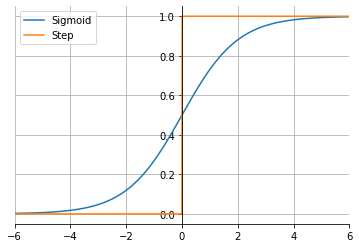

In [2]:
x = np.linspace(-10, 10, 2000)
y1 = 1 / (1 + np.exp(-x))
y2 = np.where(x > 0, 1, 0)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# Move left y-axis to center
# Eliminate upper and right axes
ax.spines["left"].set_position("center")
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")

plt.xlim([-6, 6])
plt.grid()
plt.plot(x, y1, label="Sigmoid")
plt.plot(x, y2, label="Step")
plt.legend()

In [3]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))


def predict(features, weights):
    z = np.dot(features, weights).ravel()
    hx = sigmoid(z)
    return hx


def cost_fuction(features, labels, weights):
    predictions = predict(features, weights)
    class1_cost = -labels * np.log(predictions)
    class2_cost = (1 - labels) * np.log(1 - predictions)
    cost = (class1_cost - class2_cost).sum() / len(labels)
    return cost


def update_weights(features, labels, weights, lr=0.01):
    predictions = predict(features, weights)
    gradient = np.dot(features.T, predictions - labels) / len(features)
    gradient *= lr
    weights -= gradient
    return weights


def train(features, labels, weights, lr=0.01, iters=1000, epochs=10, verbose=True):
    cost_history = []
    for i in range(iters * epochs):
        cost = cost_fuction(X, y, weights)
        cost_history.append(cost)
        weights = update_weights(features, labels, weights, lr)
        if i % iters == 0 and verbose:
            print(f"Epochs:{i // iters}, iters: {i}, cost: {cost}")
    return weights, cost_history


def classify(predictions):
    return np.where(predictions > 0.5, 1, 0)


def accuracy(predicted_labels, actual_labels):
    diff = predicted_labels - actual_labels
    return 1.0 - (float(np.count_nonzero(diff)) / len(diff))

In [4]:
X, y = make_classification(
    n_samples=20,
    n_features=1,
    n_informative=1,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=0.7,
    random_state=0
)

Text(0, 0.5, 'y')

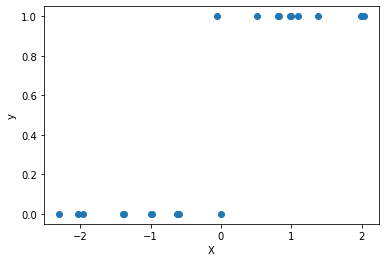

In [5]:
plt.scatter(X, y, label="Actual Value")
plt.xlabel("X")
plt.ylabel("y")

In [6]:
initial_weights = np.random.random(X.shape[-1])
weights, cost_history = train(X, y, initial_weights, epochs=10, lr=0.01)

Epochs:0, iters: 0, cost: 0.6840722402538294
Epochs:1, iters: 1000, cost: 0.1797311572509352
Epochs:2, iters: 2000, cost: 0.13806870185133643
Epochs:3, iters: 3000, cost: 0.12157633390425529
Epochs:4, iters: 4000, cost: 0.11257810809634797
Epochs:5, iters: 5000, cost: 0.10687514471983128
Epochs:6, iters: 6000, cost: 0.10292742309795626
Epochs:7, iters: 7000, cost: 0.10003024164317331
Epochs:8, iters: 8000, cost: 0.09781351180885521
Epochs:9, iters: 9000, cost: 0.09606350720667398


Text(0.5, 1.0, 'Cost Function')

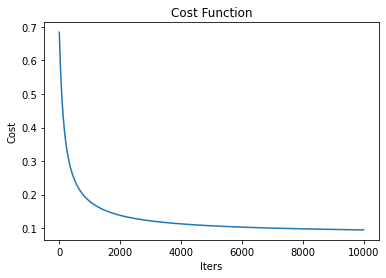

In [7]:
plt.plot(cost_history)
plt.xlabel("Iters")
plt.ylabel("Cost")
plt.title("Cost Function")

Text(0.5, 1.0, 'Cost Function')

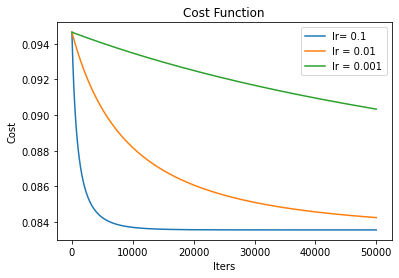

In [8]:
_, cost1_history = train(
    X, y, initial_weights.copy(), epochs=50, lr=0.1, verbose=False
)
_, cost2_history = train(
    X, y, initial_weights.copy(), epochs=50, lr=0.01, verbose=False
)
_, cost3_history = train(
    X, y, initial_weights.copy(), epochs=50, lr=0.001, verbose=False
)
plt.plot(cost1_history, label="lr= 0.1")
plt.plot(cost2_history, label="lr = 0.01")
plt.plot(cost3_history, label="lr = 0.001")
plt.legend()
plt.xlabel("Iters")
plt.ylabel("Cost")
plt.title("Cost Function")

Accuracy: 0.95


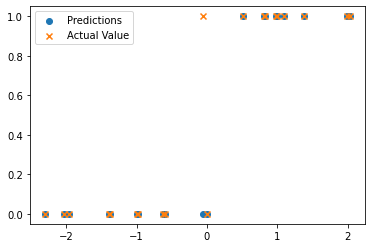

In [9]:
predictions = predict(X, weights)
plt.scatter(X, classify(predictions), marker="o", label="Predictions")
plt.scatter(X, y, marker="x", label="Actual Value")
plt.legend()
print("Accuracy:", accuracy(classify(predictions), y))

In [10]:
data = load_breast_cancer()
X = data.data
y = data.target
normalized_range = MinMaxScaler(feature_range=(0, 1))
X = normalized_range.fit_transform(X)

initial_weights = np.random.random(X.shape[-1])
weights, _ = train(X, y, initial_weights, epochs=10, iters=5000, lr=1, verbose=False)
accuracy(classify(predict(X, weights)), y)

0.9736379613356766

In [11]:
clf = LogisticRegression(random_state=0)
clf.fit(X, y)
clf.score(X, y)

0.9718804920913884